<a href="https://colab.research.google.com/github/KaydeeJR/logistics-optimization-causal-inference/blob/Main/notebooks/gokada_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Access data from drive folder

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
driver_locations = "/driver_locations_during_request.csv"
nb_completed_orders = "/nb.csv"

In [7]:
import pandas as pd
dloc_dataframe = pd.read_csv(driver_locations)
nb_dataframe = pd.read_csv(nb_completed_orders)

# **EDA Analysis**

## Sample data

In [8]:
dloc_dataframe.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001.0,243828.0,accepted,6.602207,3.270465,NaN,NaN
1,2,392001.0,243588.0,rejected,6.592097,3.287445,NaN,NaN
2,3,392001.0,243830.0,rejected,6.596133,3.281784,NaN,NaN
3,4,392001.0,243539.0,rejected,6.596142,3.280526,NaN,NaN
4,5,392001.0,171653.0,rejected,6.609232,3.288800,NaN,NaN


In [9]:
nb_dataframe.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


## Univariate analysis

In [10]:
dloc_dataframe.describe()

,id,order_id,driver_id,lat,lng,created_at,updated_at
count,96177.000000,96176.000000,96176.000000,96176.000000,96176.000000,0.0,0.0
mean,48088.000998,394169.713213,234860.599360,6.536228,3.375935,NaN,NaN
std,27764.051030,1141.293179,21684.130391,0.057824,0.048506,NaN,NaN
min,1.000000,392001.000000,171091.000000,6.420531,3.146252,NaN,NaN
25%,24044.000000,393238.000000,243040.000000,6.499020,3.350841,NaN,NaN
50%,48088.000000,394286.000000,243668.000000,6.544302,3.363481,NaN,NaN
75%,72132.000000,395075.000000,244100.000000,6.588951,3.382999,NaN,NaN
max,96176.000000,396052.000000,245679.000000,6.696798,3.831977,NaN,NaN


In [11]:
dloc_dataframe['driver_action'].describe()

count        96176
unique           2
top       rejected
freq         94037
Name: driver_action, dtype: object

In [12]:
nb_dataframe.describe()

,Trip ID
count,206202.00000
mean,624716.90440
std,133561.30087
min,391996.00000
25%,511694.25000
50%,630877.50000
75%,733535.75000
max,859383.00000


In [13]:
nb_dataframe.drop(['Trip ID'], axis=1).describe()

,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
count,206202,206201,206050,206200
unique,60256,78049,197759,198025
top,"6.6137933,3.357997","6.497595,3.383098",2021-07-09 13:34:01,2021-08-17 12:21:34
freq,556,336,5,4


## Column datatypes

In [14]:
dloc_dataframe.dtypes

id                 int64
order_id         float64
driver_id        float64
driver_action     object
lat              float64
lng              float64
created_at       float64
updated_at       float64
dtype: object

In [15]:
nb_dataframe.dtypes

Trip ID              int64
Trip Origin         object
Trip Destination    object
Trip Start Time     object
Trip End Time       object
dtype: object

## Missing values in each dataset

In [16]:
print(dloc_dataframe.isnull().sum() * 100 / len(dloc_dataframe))

id                 0.00000
order_id           0.00104
driver_id          0.00104
driver_action      0.00104
lat                0.00104
lng                0.00104
created_at       100.00000
updated_at       100.00000
dtype: float64


In [ ]:
print(nb_dataframe.isnull().sum() * 100 / len(dloc_dataframe))
print(nb_dataframe.isnull().sum())

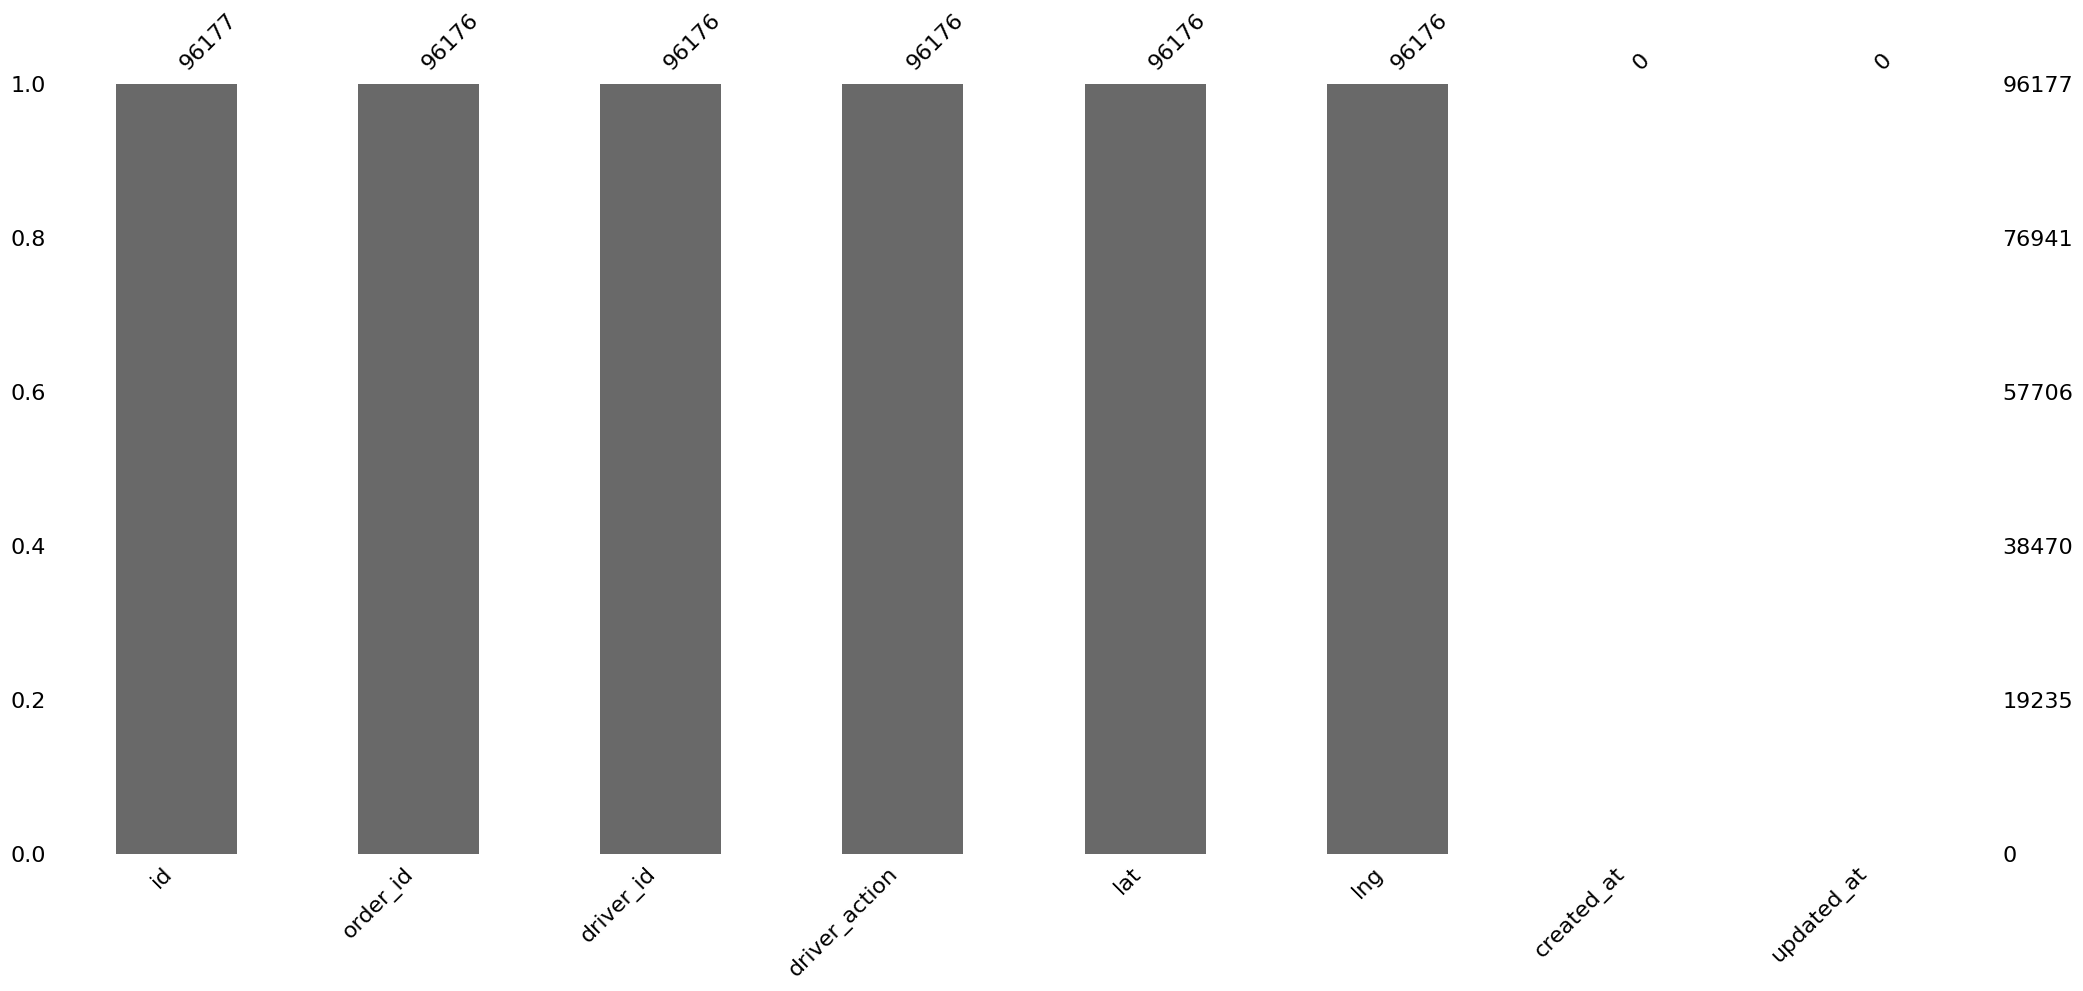

In [17]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(dloc_dataframe, labels=list(dloc_dataframe.columns))
plt.show()

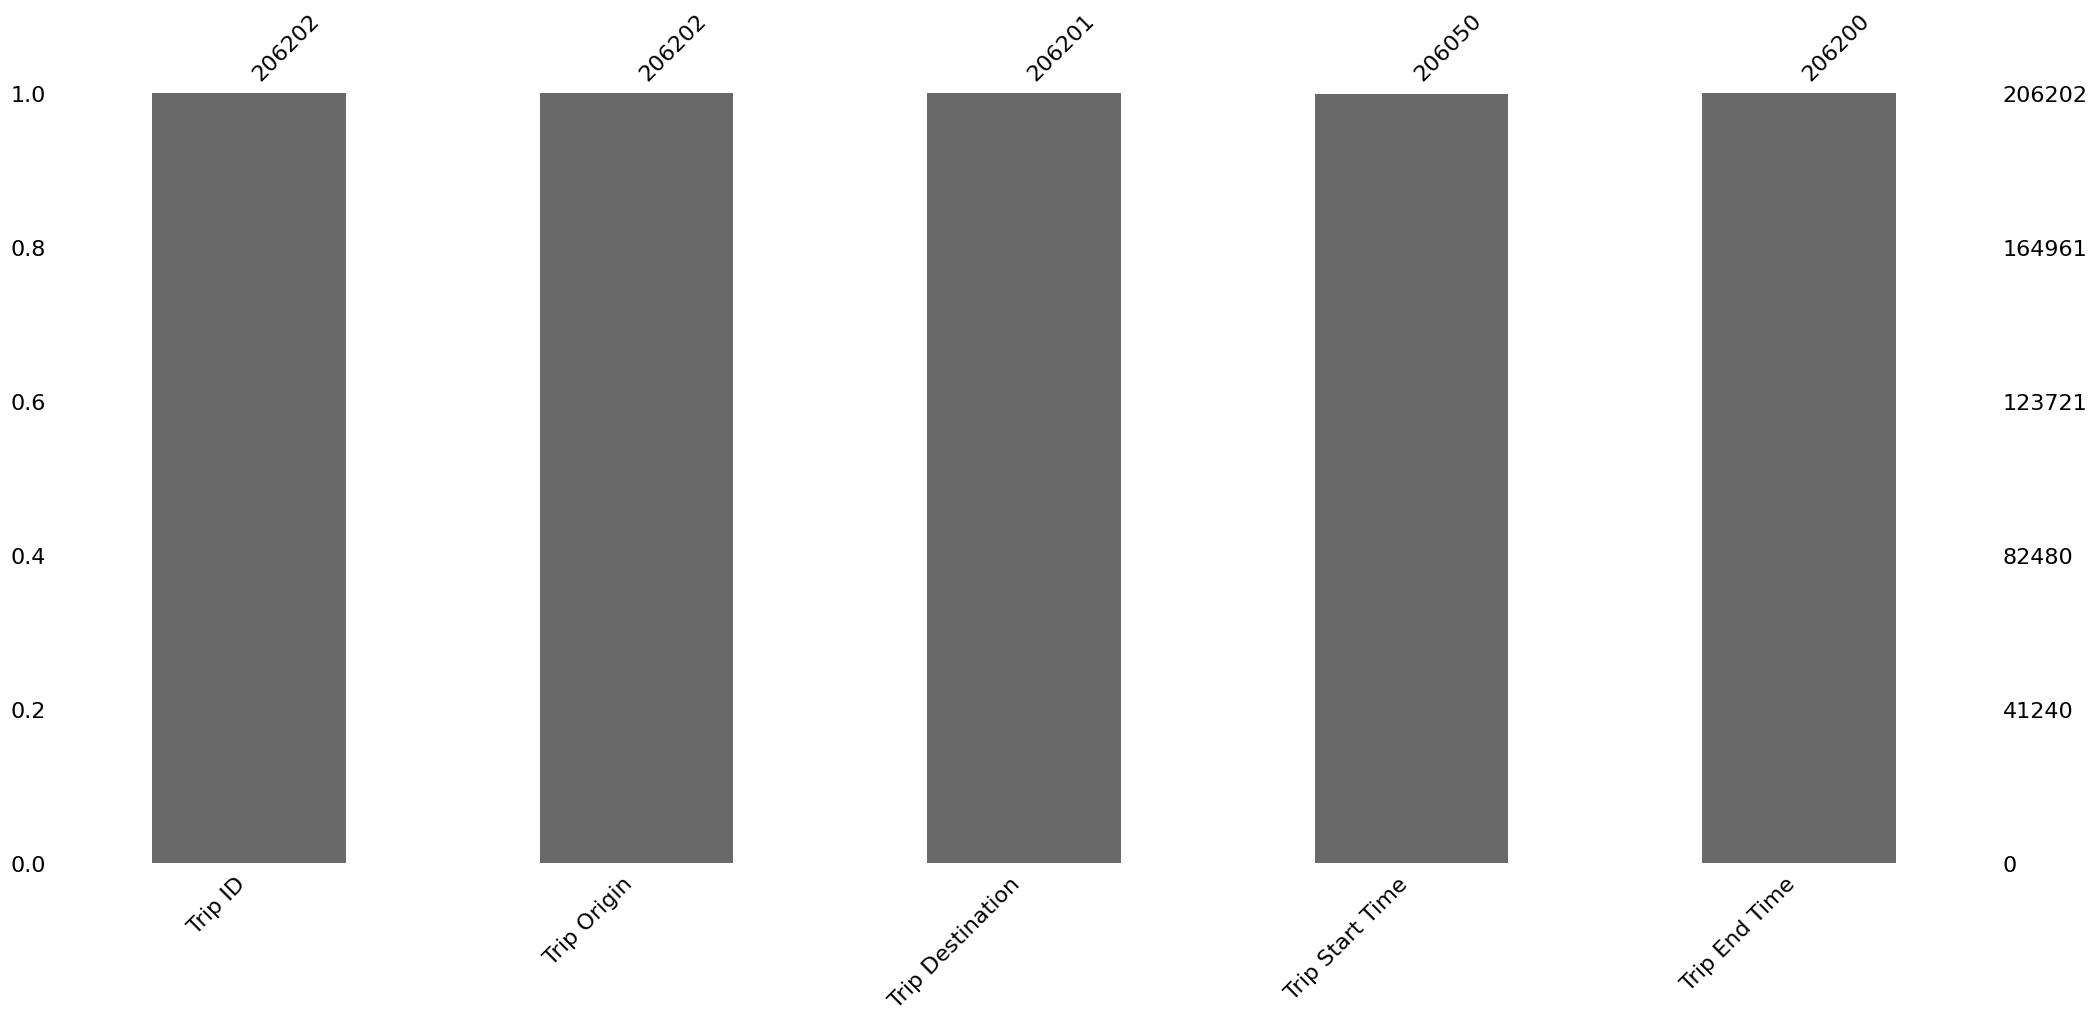

In [18]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(nb_dataframe, labels=list(nb_dataframe.columns))
plt.show()

## Merging datasets

In [22]:
# using driver location dataframe as the base dataframe
merged_data = pd.merge(nb_dataframe, dloc_dataframe, left_index=True, right_on='order_id').reset_index()
merged_data.drop('index',axis=1).to_csv('merged_data .csv')